<a href="https://colab.research.google.com/github/gabrielnicolini/DataScience/blob/main/Analisando_os_Dados_do_Airbnb_Tokyo_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Tokyo*

O [Airbnb](https://www.airbnb.com.br/) é considerado como sendo a **maior empresa hoteleira da atualidade**. E o mais engraçado é que ela **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa, agradavel e fácil.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tokyo, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Tokyo" width="75%" src="https://www.melhoresdestinos.com.br/wp-content/uploads/2019/02/passagens-aereas-tokyo-capa2019-01.jpg"></center>

## Obtenção dos Dados


In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-03-27/visualisations/listings.csv")

## Análise dos Dados

Nesta parte estarei dando uma olhada nos tipos de dados de nosso dataset para verificar quais os tipos de variáveis e para checar como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o anúncio
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11000,3,165,2020-03-04,1.42,1,363
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7677,3,228,2020-01-18,2.25,1,148
2,899003,"Classy room @Shinjuku, Takadanoba",4799233,Yu,NaN,Shinjuku Ku,35.71019,139.69755,Entire home/apt,5200,30,93,2019-11-25,0.94,2,0
3,1016831,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,5596383,Wakana,NaN,Setagaya Ku,35.65800,139.67134,Private room,4000,1,211,2020-03-16,2.17,1,0
4,1033276,private room @Senju area,5686404,NaN,NaN,Adachi Ku,35.74437,139.79739,Private room,30000,1,72,2018-06-17,0.75,2,271


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar a quantidade de entradas que nosso dataset possui e verificar o tipo de dado em cada coluna

Detalhe: O dataset apresentado nesta analise e uma versao "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa.(`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11197
Entradas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* esta diretamente ligada com quantidade de valores ausentes ou missing values. Para uma analise mais sofisticada, e importante verificar se os valores nulos serao significativos se comparados ao total de entradas de nosso dataset.

 * E possivel ver que a coluna `neighbourhood_group` possui 100% de seus valores faltantes.
 * Tambem e possivel observar que a quantidade de dados faltantes da coluna `reviews_per_month ` e `last_review` sao identicos
 

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.183621
last_review                       0.183621
host_name                         0.027239
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

In [6]:
# verificando quantidade de dados ausentes
(df.isnull().sum()).sort_values(ascending=False)

neighbourhood_group               11197
reviews_per_month                  2056
last_review                        2056
host_name                           305
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
name                                  0
id                                    0
dtype: int64

Podemos observar que existem muitos dados faltantes na coluna `neighbourhood_group`, `reviews_per_moonth`, `last_review` e `host_name`, como estas colunas nao possuem relevancia na analise que iremos fazer, iremos excluir estes valores faltantes.

In [7]:
#excluindo colunas com dados faltantes
df.drop(columns=['neighbourhood_group', 'reviews_per_month', 'last_review'], inplace=True)

#excluindo entradas com dados faltantes 
df.dropna(axis=0, inplace=True)


### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, vamos plotar o histograma.

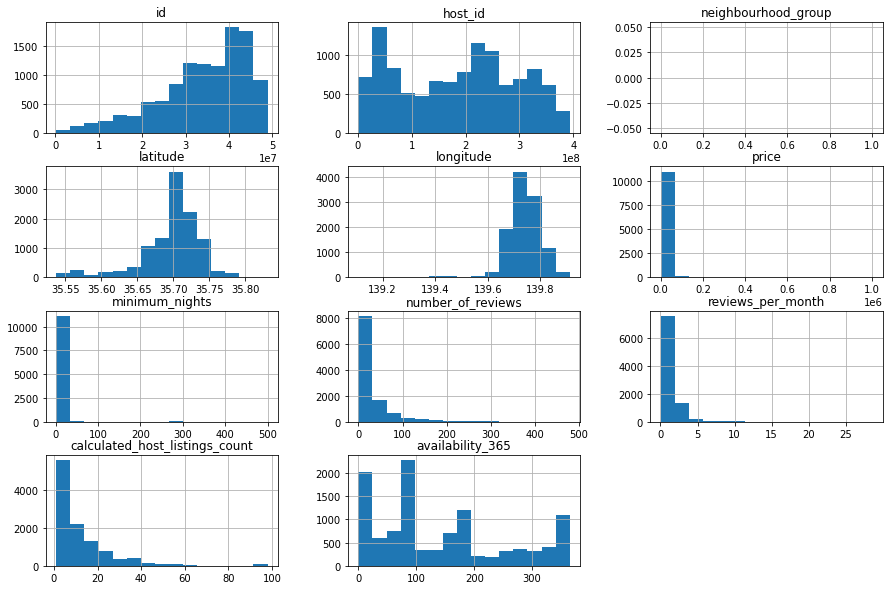

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver resumo estatistico das variaveis numericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11197.000000,11197.000000,11197.000000,9141.000000,11197.000000,11197.000000
mean,12843.618826,3.739841,26.626150,1.166016,12.527552,141.485934
std,32150.627375,18.345848,41.647206,1.175441,14.493499,114.782571
min,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,4500.000000,1.000000,1.000000,0.380000,3.000000,56.000000
50%,7800.000000,1.000000,10.000000,0.910000,8.000000,95.000000
75%,13000.000000,2.000000,34.000000,1.590000,16.000000,209.000000
max,1000000.000000,500.000000,479.000000,28.540000,98.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 13000, porém seu valor máximo é 1000000.
* O valor max da quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano. O que e algo estranho de se pensar para o AirBnB

#### Boxplot para minimum_nights

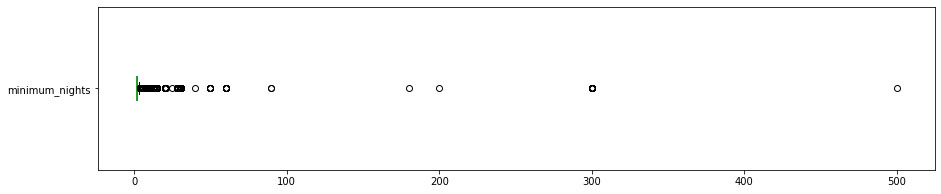

minimum_nights: valores acima de 30:
11197 entradas
0.5716%


In [ ]:
#minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 30 dias para o minimum_nights
print('minimum_nights: valores acima de 30:')
print("{} entradas".format(len(df.minimum_nights > 30)))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

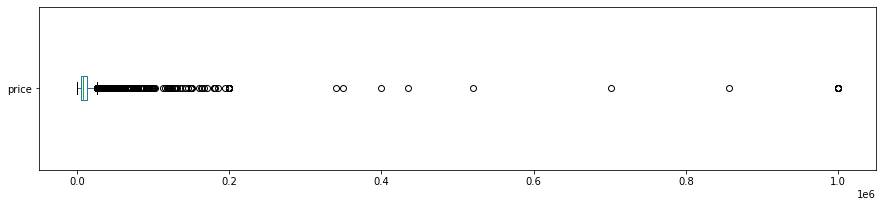


price: valores acima de 25000
967 entradas
8.6362%


In [ ]:
#price 

df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 3000 para price
print("\nprice: valores acima de 25000")
print("{} entradas".format(len(df[df.price > 25000])))
print("{:.4f}%".format((len(df[df.price > 25000]) / df.shape[0])*100))

#### Definindo o range dos outliers que serao limpos


Verificando os histogramas e os boxplots, agora iremos definir quais serao os dados a serem limpados de nosso dataset.
Para trata-los vamos seguir os seguintes passos:

* Definir o Q1 e Q3 para as variaveis que serao limpas
* Calcular o IQR para as variaveis
* Definir o limite superior e inferior para cortar os outliers
* Remover os outliers

In [9]:
#identificando os outliers para as variavel price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variavel price', IQR_price)

#definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q3_price - 1.5 * IQR_price

print('Limite superior de price:', sup_price)
print('Limite inferior de price:', inf_price)

IQR da variavel price 8500.0
Limite superior de price: 25750.0
Limite inferior de price: 250.0


In [10]:
#identificando os outliers para as variavel price
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variavel minimum_nights', IQR_minimum_nights)

#definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q3_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights:', sup_minimum_nights)
print('Limite inferior de minimum_nights:', inf_minimum_nights)

IQR da variavel minimum_nights 1.0
Limite superior de minimum_nights: 3.5
Limite inferior de minimum_nights: 0.5


#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

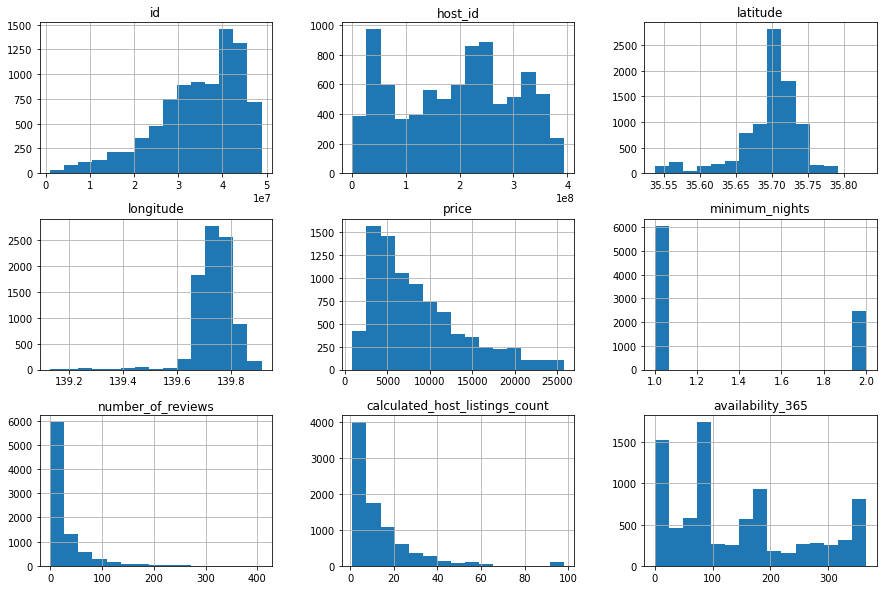

In [18]:
# remover os *outliers* em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 25750.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 2].index, axis=0, inplace=True)


#plotar o histograma para as variaveis numericas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.043162,-0.001563,0.035195,-0.183871,-0.003248
minimum_nights,-0.043162,1.000000,-0.045886,-0.109960,-0.024063,-0.013872
number_of_reviews,-0.001563,-0.045886,1.000000,0.675916,-0.155579,0.040445
reviews_per_month,0.035195,-0.109960,0.675916,1.000000,-0.134940,-0.010076
calculated_host_listings_count,-0.183871,-0.024063,-0.155579,-0.134940,1.000000,0.081466
availability_365,-0.003248,-0.013872,0.040445,-0.010076,0.081466,1.000000


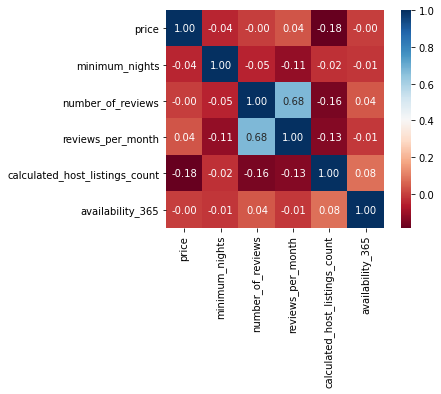

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q4. Qual a média dos preços de aluguel?**

A coluna da variavel `price` nos mostra o preco do aluguel daquele imovel, iremos checar a media dos precos para termos uma nocao de valores

In [19]:
# ver a média da coluna `price``

df_clean.price.mean()

8571.239836448598

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [20]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    5906
Private room       1937
Hotel room          398
Shared room         319
Name: room_type, dtype: int64

In [21]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.689953
Private room       0.226285
Hotel room         0.046495
Shared room        0.037266
Name: room_type, dtype: float64

Podemos ver que a maioria dos imoveis para alugar sao casas ou apartamentos inteiros seguido de quartos privados e quartos de hotel.

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. Neste caso, iremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [22]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Okutama Machi    17333.333333
Kodaira Shi      11768.500000
Komae Shi        11500.000000
Minato Ku        10446.654762
Shibuya Ku        9849.336493
Koganei Shi       9287.500000
Shinjuku Ku       9245.673433
Chiyoda Ku        9170.176471
Taito Ku          8948.288520
Arakawa Ku        8843.600000
Name: price, dtype: float64

In [26]:
#ver quantidade de imoveis em Okutama Machi

print(df_clean[df_clean.neighbourhood == "Okutama Machi"].shape)

#ver as entradas de Okutama Machi

df_clean[df_clean.neighbourhood == "Okutama Machi"]


(3, 13)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
1685,22627182,渓谷の傍の別荘 - Tranquil Villa Nearby a Beautiful Va...,59835166,Kazuya,Okutama Machi,35.81232,139.12936,Entire home/apt,23000,1,97,1,166
7717,41015004,New opening in 2020!! OKUTAMA+,298916888,Kaito,Okutama Machi,35.81175,139.15732,Shared room,5000,1,31,2,71
8252,41967911,2020年新規オープン！wifi完備！OKUTAMA+教室に泊まろう個室貸切プラン,298916888,Kaito,Okutama Machi,35.81258,139.15654,Private room,24000,1,7,2,87


In [32]:
#ver quantiadde de imoveis em Komae Shi

print(df_clean[df_clean.neighbourhood == "Shibuya Ku"].shape)

#ver as entradas de Komae Shi

df_clean[df_clean.neighbourhood == "Shibuya Ku"]


(422, 13)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
64,3838856,SHINJUKU ★Designer Pencil House★ Sanitized,4626879,Sam,Shibuya Ku,35.68245,139.69009,Entire home/apt,15235,1,171,7,286
93,4825779,Japanese Modern Apt / 2 Stops to Shinjuku (#1),24812892,Mao,Shibuya Ku,35.67748,139.68059,Entire home/apt,5044,1,229,1,90
100,4925503,SHIBUYA SHINJUKU Hatagaya Station 5 minutes#103,25370510,Mitsuko,Shibuya Ku,35.67923,139.67571,Entire home/apt,3271,1,160,6,237
102,4926317,#102 SHIBUYA SHINJUKU 幡ヶ谷駅徒歩5分 観光ショッピングに便利！,25370510,Mitsuko,Shibuya Ku,35.68068,139.67530,Entire home/apt,8000,1,269,6,87
103,4926426,#203 新宿/渋谷 テレワーク/受験生/NURO光 FREE WIFI/感染対策済み/駅近,25370510,Mitsuko,Shibuya Ku,35.67969,139.67656,Entire home/apt,8000,1,227,6,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11036,47999492,新宿至近/西新宿五丁目駅徒歩8分/WIFI有/快適/閑静/便利/コインランドリー周辺に多数有...,386939047,康典,Shibuya Ku,35.68652,139.67763,Entire home/apt,5000,1,0,3,165
11038,47999933,西新宿五丁目徒歩8分/WIFI/便利/閑静/周辺にコインランドリー多数/203,386939047,康典,Shibuya Ku,35.68668,139.67985,Entire home/apt,5000,1,0,3,154
11044,48048503,【ROOM404】SHIBUYA AREA! 5MIN STN! MAX 4PPL! 1R ...,207693509,健二,Shibuya Ku,35.65983,139.69673,Entire home/apt,9143,1,0,8,164
11049,48079895,和漢洋折衷(わかんようせっちゅう),305354548,Tomoyuki,Shibuya Ku,35.65694,139.71056,Entire home/apt,10000,1,0,7,31


In [31]:
#ver quantidade de imoveis em Kodaira Shi 
print(df_clean[df_clean.neighbourhood == "Minato Ku "].shape)

#ver as entradas de Kodaira Shi 

df_clean[df_clean.neighbourhood == "Minato Ku"]

(0, 13)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
191,6803014,"Mid-Tokyo, Nature-Rich - Designer""Tiny"" House",35614067,Kan,Minato Ku,35.63463,139.72773,Entire home/apt,19500,2,138,1,146
194,6815505,Omotesando House.表参道/南青山.,35684204,Junko,Minato Ku,35.66494,139.71890,Entire home/apt,13800,2,130,2,189
215,7227038,"Azabu- spacious apt,Hammock♥",37836517,Akari,Minato Ku,35.65584,139.73425,Entire home/apt,18500,1,208,1,333
249,7948752,Omotesando! Two dobble beds!,35684204,Junko,Minato Ku,35.66520,139.71831,Entire home/apt,13800,2,20,2,183
272,8372308,East Toranomon is the Central Tokyo,43230315,Hirotake,Minato Ku,35.66839,139.75200,Entire home/apt,24249,1,199,2,338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10944,47541030,Roppongi&Akasaka Area★5min from sta.★Free WIFI...,276966400,Mutsuka,Minato Ku,35.66729,139.73815,Entire home/apt,10771,2,4,4,347
10945,47541081,Roppongi&Akasaka Area★5min from sta.★Free WIFI...,276966400,Mutsuka,Minato Ku,35.66883,139.73821,Entire home/apt,7343,2,5,4,345
11063,48127305,5 min from Station/near Tokyo Tower/Free Wifi/301,388123518,琴,Minato Ku,35.65330,139.74660,Entire home/apt,12429,2,3,3,186
11066,48142320,5 min from Station/near Tokyo Tower/Free Wifi/302,388123518,琴,Minato Ku,35.65165,139.74529,Entire home/apt,7071,2,1,3,339


Podemos ver que para esta variavel é algo fácil se enganar quanto ao local mais caro, os 3 primeiros distritos desta lista, embora possuam valores relativamente elevados, possuem pouca oferta de imóveis por se tratarem de locais muito afastados do centro de Tóquio, já Shibuya, Minato e Shinjuku são os distritos mais populosos e demograficamente densos de Tóquio, possuindo uma oferta de imóveis muito maior, com uma distribuição de preço muito maior.
Podemos dizer que devido a pequena quantidade de observações para este conjunto de dados não podemos tirar nenhuma conclusão razoável a respeito do conjunto total.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

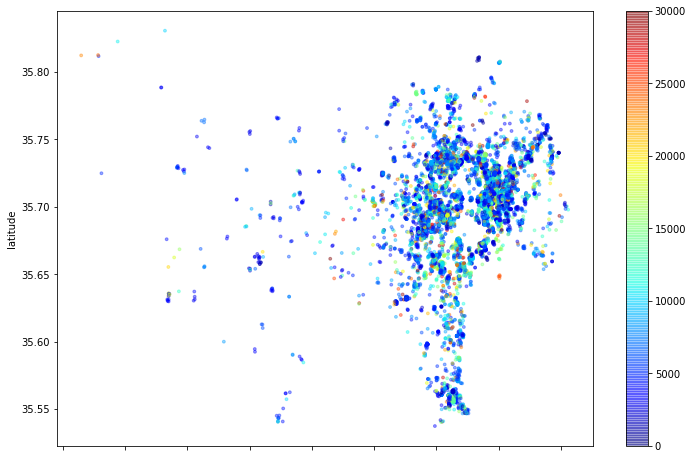

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [33]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

1.2901869158878505

## Conclusões

Como ja mencionado no Q1 deste notebook, este dataset retrata apenas um resumo dos dados do AirBnBm, e por conta disto temos uma analise menos detalhada e com menos profundidade dos dados.

Dito isto, podemos observar que se e muito presente neste dataset outliers em algumas das variaveis.

Tambems notamos que em algumas localidades existem pouquissimos imoveis, distorcendo as informacoes estatisticas de alguns atributos como podemos ver no Q6.

Por fim, lembro que esta e apenas a analise superficial de um estudante de cientista de dados iniciando neste grande mundo.

Para uma analise mais profunda dos dados, favor ir ao site http://insideairbnb.com/get-the-data.html e baixar o arquivo `	listings.csv.gz`. 
Obrigado!